In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#storing the csv in videos_df
videos_df = pd.read_csv("D:\\USvideos.csv", error_bad_lines = False)
videos_df.head(10)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   
5  cMKX2tE5Luk    The Disaster Artist | Official Trailer HD | A24   
6  8wNr-NQImFg       The Check In: HUD, Ben Carson and Hurricanes   
7  _HTXMhKWqnA                   iPhone X Impressions & Hands On!   
8  _ANP3HR1jsM                         ATTACKED BY A POLICE DOG!!   
9  zgLtEob6X-Q                 Honest Trailers - The Mummy (2017)   

                 channel_title  category_id  \
0             Logan Paul Vlogs           24   
1                        Apple           28   
2                    PewDiePie           22   
3                    The Verge           28   
4                   jacksfilms           23   
5                          A24            1   
6  Late Night with Seth Meyers           23   
7             Marques Brownlee           28   
8             RomanAtwoodVlogs           22   
9               Screen Junkies            1   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   
5  a24|a24 films|a24 trailers|independent films|t...  1311445   34507   
6  Late night|Seth Meyers|check in|hud|Ben Carson...   666169    9985   
7  iPhone X|iphone x|iphone 10|iPhone X impressio...  1728614   74062   
8  Roman Atwood|Roman|Atwood|roman atwood vlogs|f...  1338533   69687   
9  screenjunkies|screen junkies|screenjunkies new...  1056891   29943   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   
5       544           3040  https://i.ytimg.com/vi/cMKX2tE5Luk/default.jpg   
6       297           1071  https://i.ytimg.com/vi/8wNr-NQImFg/default.jpg   
7      2180          15297  https://i.ytimg.com/vi/_HTXMhKWqnA/default.jpg   
8       678           5643  https://i.ytimg.com/vi/_ANP3HR1jsM/default.jpg   
9       878           4046  https://i.ytimg.com/vi/zgLtEob6X-Q/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09  
5  13.09  
6  13.09  
7  13.09  
8  13.09  
9  13.09

In [3]:
# saving all tags in all_tags
all_tags = ' '.join(videos_df['tags'])
all_tags

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

## Cleaning Data
The tags are cleaned and got rid of special characters and numbers with regex (regular expressions)

In [4]:
#removing special characters with regex
import re
all_tags = re.sub('[^a-zA-Z]',' ', all_tags) #except for alphabets, replace every other character with a space
all_tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [5]:
#removing extra spaces with regex
all_tags = re.sub(' +', ' ', all_tags)
all_tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

## Visualization of popularity of tags using Wordcloud
We can visualize the popularity and frequency of each tag by the size on the wordcloud. It's a visually appealing representation of frequency.
Made it black and white to improve legibility and visibility of text in wordcloud.
The wordcloud can be saved by right clicking the wordcloud and saving the picture.

(-0.5, 2999.5, 1999.5, -0.5)

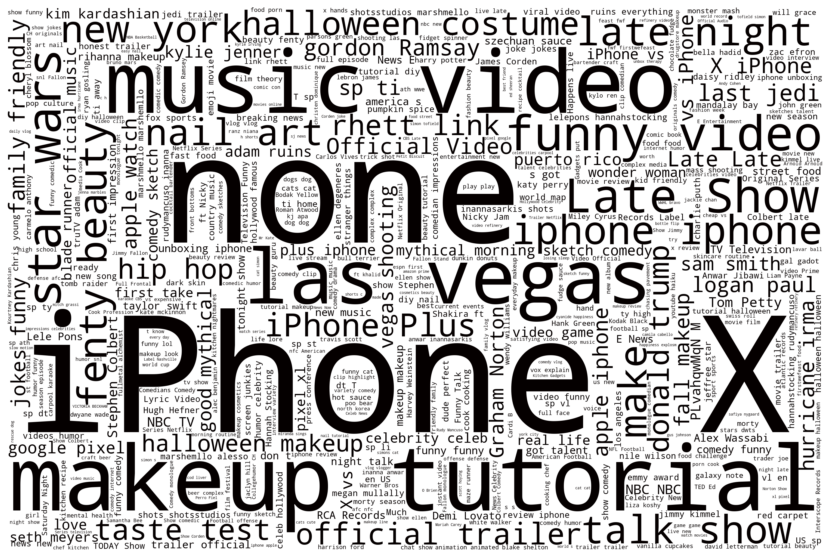

In [6]:
from wordcloud import WordCloud, STOPWORDS
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to  500 and set width and height to higher quality, 3000 x 2000
cloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500, stopwords = set(STOPWORDS)).generate(all_tags)
cloud.recolor(color_func = black_color_func) #set the word color to black
plt.figure(figsize=[15,10])# set the figsize
plt.imshow(cloud, interpolation="bilinear")# plot the wordcloud
plt.axis("off")# remove plot axes

## Relationship between Likes and Views
We can find this by using Correlation between likes and dislikes and views.
We visualise the correlation using a heat map from seaborn library.

In [7]:
# verifying the correlation between views, likes and dislikes
corr_df = videos_df[['views', 'likes', 'dislikes']]
corr_df.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

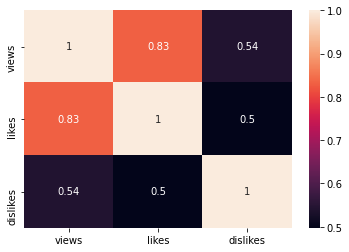

In [8]:
sns.heatmap(corr_df.corr(), annot = True)
#this shows high correlation between likes and views of 0.83

## Establishing the trend between likes and views using Supervised Learning Model of Linear Regression.
Linear Regression is a good fit for this problem statement as it's got two values with high correlation values. We train and test the dataset.

In [9]:
# seperating the likes and views from the dataset
X = videos_df.iloc[:, -6].values
Y = videos_df.iloc[:, 6]
Y = np.array(Y)
X = np.vstack(X)
print("Views: ", X)
print("Likes: ", Y)

Views:  [[4394029]
 [7860119]
 [5845909]
 ...
 [ 142908]
 [  24532]
 [ 144039]]
Likes:  [320053 185853 576597 ...   7088   2148   1574]


In [45]:
#splitting our data into test and train value sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30)

In [46]:
#Training the linear regression model
from sklearn.linear_model import LinearRegression
try:
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)
    y_pred=regressor.predict(X_test)
except:
    raise RuntimeError("Regression model training couldn't be performed")
else:
    print("Regression model training successfully.")

Regression model training successfully.


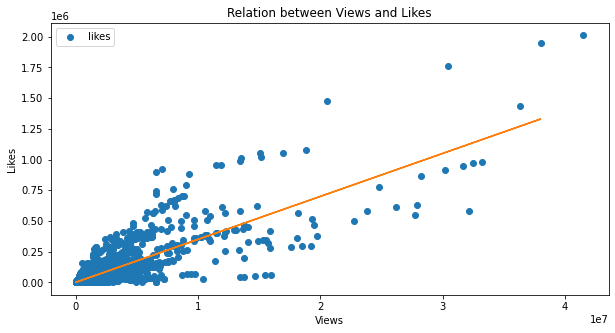

In [47]:
#visualizing the regression on a graph

videos_df.plot(x = "views", y = "likes", figsize = (10,5), style = 'o')
line = regressor.coef_ * X_train + regressor.intercept_ # y = mx + c format
plt.plot(X_train, line)
plt.title("Relation between Views and Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()

#it shows an increasing trend. The more the views, the more the likes.

In [48]:
#input views of video to find an estimate of the number of likes it might get. 
vid_views = int(input("Enter the number of views your video has: "))
prediction = regressor.predict([[vid_views]])
x = int(prediction[0])
print("The video might get {} likes if it has {} views.".format(x, vid_views))

Enter the number of views your video has: 300000
The video might get 12020 likes if it has 300000 views.


### Error Analysis of Linear Regression

In [49]:
#RMSE of Linear Regression Model

from sklearn.metrics import mean_squared_error
import math

regressor_rmse = math.sqrt(mean_squared_error(Y_test,y_pred))
print(" The Root Mean Square Error (RMSE) of the Linear Regression Model is ", round(regressor_rmse, 3))

 The Root Mean Square Error (RMSE) of the Linear Regression Model is  50592.479


In [50]:
# R2 score of Linear Regression Model
from sklearn.metrics import r2_score
import math
print("R2 score of Linear Regression Model is : ", round(r2_score(Y_test, y_pred), 3))

R2 score of Linear Regression Model is :  0.72


**Error Analysis**: The magnitude of error is rather high due to the high magnitude of views and likes. Also, this happens due to the circumstance and content based performance of videos and the response of audience with likes and dislikes. Hence the RMSE penalized outliers heavily. The R2 score is high due to the variance of the data points from the regression line. This shows the regression has subsequently lower bias.

## Establishing the trend between likes and views using Unsupervised Learning Model of k-Nearest Neighbor

In [71]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 10)
knn_model=knn_regressor.fit(X_train,Y_train)
y_knn_pred=knn_model.predict(X_test)

In [72]:
knn_kfold = model_selection.KFold(n_splits=10)
results_kfold = model_selection.cross_val_score(knn_model, X_test, Y_test.astype('int'), cv=knn_kfold)
print("Accuracy:", results_kfold.mean()*100)

Accuracy: 63.39032544232042


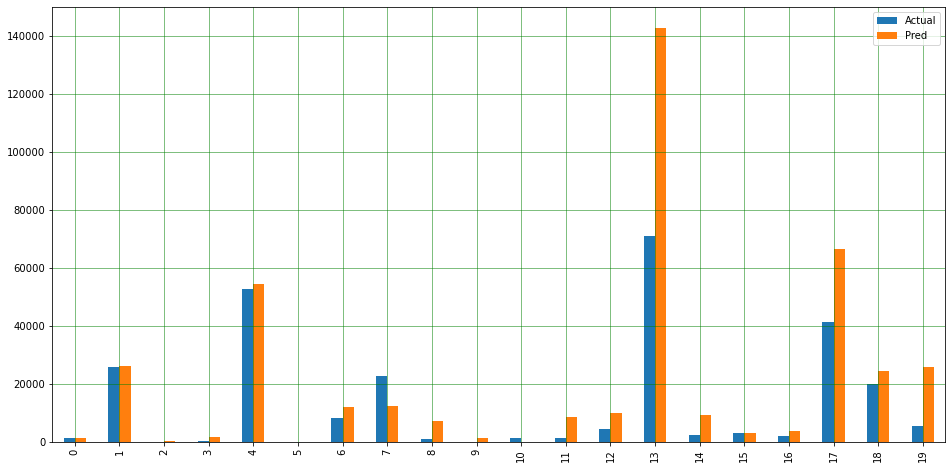

In [73]:
plot_knn_df=pd.DataFrame({'Actual':Y_test,'Pred':y_knn_pred})
plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Error Analysis of knn model

In [75]:
#RMSE of KNN Model

knn_mse=math.sqrt(mean_squared_error(Y_test,y_knn_pred))
print("The RMSE of the KNN Model is ", round((knn_mse), 3))

The RMSE of the KNN Model is  53277.907


In [77]:
# R2 score of KNN Model
print("R2 score of KNN Model is : ", round(r2_score(Y_test, y_knn_pred), 3))

R2 score of KNN Model is :  0.69
